In [ ]:
import pandas as pd
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blogs.csv to blogs.csv


1. Data Exploration and Preprocessing

In [ ]:
blogs=pd.read_csv('blogs.csv')
blogs.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
import spacy
from wordcloud import WordCloud


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'on', 'against', 'its', "aren't", 'as', 'wouldn', 'him', 'those', 'not', 'been', 'don', "you'd", "should've", 'has', "that'll", 'over', 'why', 'haven', "you're", 'nor', 'isn', 'aren', "shouldn't", 'did', 'off', 'being', 'we', 'wasn', 'mightn', 'here', "it's", 'am', 'if', 'you', 'no', 'again', 'yourself', 'an', 'yours', 'at', 'about', 'd', 'of', "wasn't", 'only', 'very', 'above', 'under', 'doesn', 'herself', 'such', 'further', 'couldn', "shan't", 'by', 'than', 'these', 'our', 'for', 'having', 'some', 'ma', 'do', 'should', 'their', 'while', 'themselves', 'where', "you've", 'the', 'have', 'myself', 'will', 'into', 'then', 'hadn', "hasn't", 'now', 'ourselves', 't', "don't", "hadn't", 'how', 'your', 'whom', "needn't", "isn't", 'his', 'both', 'own', 'from', 'theirs', 'once', 'was', 'a', 'but', 'all', 'had', 'mustn', 'and', 'same', 'needn', 'are', 'himself', 'with', "mustn't", 'yourselves', "doesn't", 'after', 'weren', 've', 'until', 'them', 'below', 'm', "haven't", 'that', 'which', 'between

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
# Apply the preprocess_text function to your data
blogs['cleaned_text'] = blogs['Data'].apply(preprocess_text)
blogs.head()

,Data,Labels,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = blogs['Data']
y = blogs['Labels']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# Fit and transform the data
x_tfidf = tfidf_vectorizer.fit_transform(x)
print(x_tfidf.shape)



(2000, 5000)


2. Naive Bayes Model for Text Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = MultinomialNB()
model.fit(x_train, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8050


3. Sentiment Analysis

In [ ]:
from textblob import TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity




In [ ]:
# Apply the sentiment analysis
blogs[['polarity', 'subjectivity']] = blogs['Data'].apply(lambda x: pd.Series(analyze_sentiment(x)))
blogs.head()


,Data,Labels,cleaned_text,polarity,subjectivity
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0.072213,0.503328
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,-0.053757,0.492783
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,0.093119,0.480127
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,0.055008,0.519916
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,0.132183,0.333162


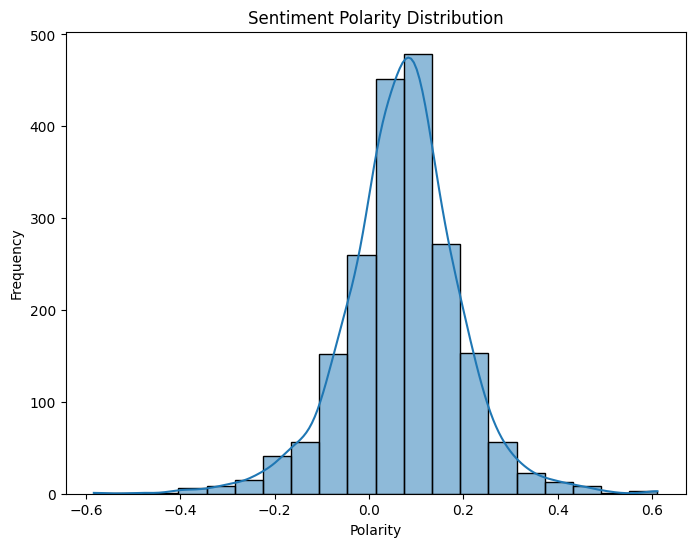

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot polarity distribution
plt.figure(figsize=(8, 6))
sns.histplot(blogs['polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


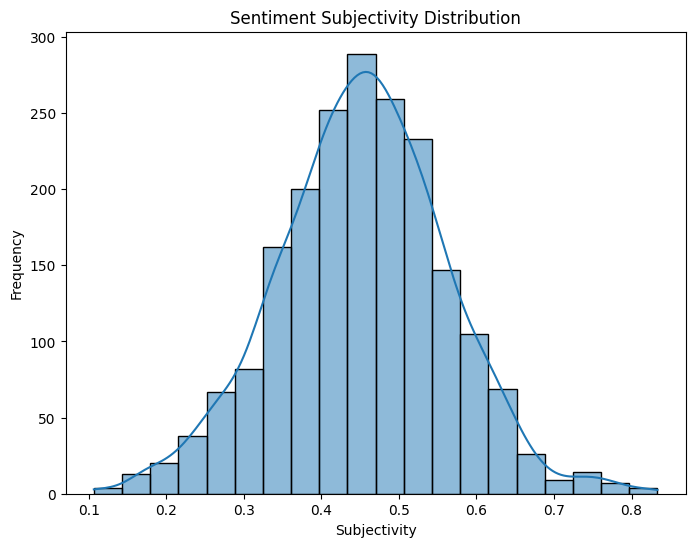

In [ ]:
# Plot subjectivity distribution
plt.figure(figsize=(8, 6))
sns.histplot(blogs['subjectivity'], bins=20, kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()



4. Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.81      1.00      0.90        22
comp.sys.ibm.pc.hardware       0.69      0.96      0.80        25
   comp.sys.mac.hardware       0.80      0.57      0.67        21
          comp.windows.x       0.92      0.48      0.63        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.70      0.89      0.78        18
         rec.motorcycles       0.93      0.81      0.87        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.65      1.00      0.79        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.90      0.56      0.69        16
                 sci.med       0.88      0.88      0.88        17
         

In [ ]:
#Analyze and Reflect on Results
mean_polarity = blogs['polarity'].mean()
mean_subjectivity = blogs['subjectivity'].mean()

print(f'Mean Polarity: {mean_polarity:.2f}')
print(f'Mean Subjectivity: {mean_subjectivity:.2f}')



Mean Polarity: 0.07
Mean Subjectivity: 0.45


In [ ]:
#  most positive and negative blog posts

most_positive = blogs.loc[blogs['polarity'].idxmax()]
most_negative = blogs.loc[blogs['polarity'].idxmin()]

print('Most Positive Blog Post:')
most_positive


Most Positive Blog Post:


,51
Data,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
Labels,alt.atheism
cleaned_text,path cantaloupesrvcscmuedudasnewsharvardeduhus...
polarity,0.611111
subjectivity,0.777778


In [ ]:
print('\nMost Negative Blog Post:')
most_negative


Most Negative Blog Post:


,923
Data,Newsgroups: rec.sport.baseball\nPath: cantalou...
Labels,rec.sport.baseball
cleaned_text,newsgroups recsportbaseball path cantaloupesrv...
polarity,-0.583333
subjectivity,0.366667
